In [166]:
# Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy as sp
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline 

In [167]:
# Get data
df = pd.read_csv("data.csv")

In [168]:
# Display data helper function
def display_data(data):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(data)

In [169]:
# Cleanup - Mark questions as 'QX' for easier future reference
columns = df.columns.tolist()
answer = 0
question = 0

for i in range(1, len(columns)):
    # Grid questions have option in '[]'
    if (columns[i].endswith(']')):
        # Check if this is first answer, if so this is a new question
        if (answer == 0):
            question = question + 1
        answer = answer + 1
        columns[i] = 'Q' + str(question) + '-' + str(answer)
    else:
        question = question + 1
        answer = 0    
        columns[i] = 'Q' + str(question)
  
df.columns = columns
# helper: display all columns for just the first row `display_data(df[1:2])`

In [170]:
# Cleanup - Remove positions that are not design specific
# helper: list all distinct positions via `set(df['Q2'])`
whitelisted_positions = ['Amaterski dizajner','CX dizajner','Dizajner interakcija','Dizajner vizualnih komunikacija','Grafički dizajner','Interactive Art Director','Marketing/Brand dizajner','Miks - Web dizajner, Dizajner interakcija, Grafički dizajner, Marketing/brand dizajner, Dizajner vizualnih komunikacijam Copywriter, UX/UI dizajner','Multimedijalni dizajner','Produkt dizajner (digitalni proizvodi)','Researcher','Student / UI dizajner / Produkt dizajner (digitalni proizvodi)','UI dizajner','UI/UX/grafički dizajner/dizajner vizualnih komunikacija','UX dizajner','UX/UI dizajner','Web dizajner','Web dizajner, graficki dizajner, marketing/branding dizajner, ux/ui dizajner']
df = df[df['Q2'].isin(whitelisted_positions)]

In [171]:
# Helper columns (I for Index)
salary_descriptive_keys = {'Trenutno nisam zaposlen':0, 'Manje od 2800kn':1, '2800kn - 4900kn':2, '5000kn - 6900kn':3, '7000kn - 8900kn':4, '9000kn - 9900kn':5, '10000kn - 12900kn':6, '13000kn - 15900kn':7, '16000kn - 20000kn':8, '20000kn i više':9, 'Nisam zaposlen ali freelanceam':10}
sorted_salary_descriptive = sorted(salary_descriptive_keys, key=salary_descriptive_keys.get)
df['Q21(I)'] = df['Q21'].replace(salary_descriptive_keys)

# Segmentation

## By Sex

In [172]:
female = df[df['Q3']=='Ženski']
male = df[df['Q3']=='Muški']

num_female = len(female)
num_male = len(male)
num_undefined = len(df) - num_female - num_male

print('Survey completed by ', num_female,' females, ', num_male, ' males, and ', num_undefined, ' undefined')

Survey completed by  57  females,  102  males, and  2  undefined


Q21(I)  Q21                             Q3    
0       Trenutno nisam zaposlen         Ženski     1
2       2800kn - 4900kn                 Muški      8
                                        Ženski     8
3       5000kn - 6900kn                 Muški     20
                                        Ženski    16
4       7000kn - 8900kn                 Muški     21
                                        Ženski    12
5       9000kn - 9900kn                 Muški      4
                                        Ženski     5
6       10000kn - 12900kn               Muški     15
                                        Ženski     5
7       13000kn - 15900kn               Muški      8
                                        Ženski     3
8       16000kn - 20000kn               Muški      7
9       20000kn i više                  Muški     13
                                        Ženski     1
10      Nisam zaposlen ali freelanceam  Muški      6
                                        Ženski     6

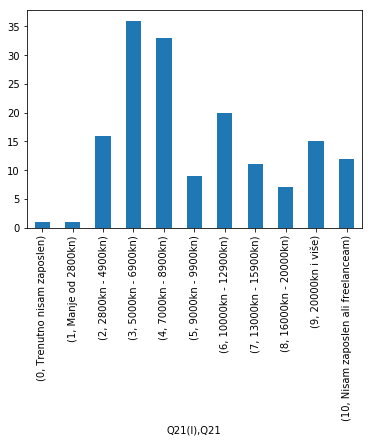

In [173]:
# Salary
# General
salary_general = df.groupby(['Q21(I)', 'Q21']).count().iloc[:,1]
salary_general_with_sex = df[df.Q3 != "N/A OR OTHER"].groupby(['Q21(I)', 'Q21', 'Q3']).count().iloc[:,1]
display(salary_general_with_sex)
salary_general.plot(kind='bar', label='Q21')

In [174]:
# By Sex
salary_female = female.groupby(['Q21(I)']).count().iloc[:,1].reset_index(name='Q3(count)')
salary_male = male.groupby(['Q21(I)']).count().iloc[:,1].reset_index(name='Q3(count)')

# @TODO: Remove index 10 (freelancer) as it doesn't carry any value 

In [175]:
salary_female_df = DataFrame(salary_female)
salary_male_df = DataFrame(salary_male)

salary_female_df['Q3(rel)'] = (salary_female_df['Q3(count)'] / salary_female_df['Q3(count)'].sum()) * 100
salary_male_df['Q3(rel)'] = (salary_male_df['Q3(count)'] / salary_male_df['Q3(count)'].sum()) * 100

salary_sex_compared_df = pd.merge(salary_female_df, salary_male_df, on='Q21(I)', how='outer', suffixes=('_female', '_male'))
salary_sex_compared_df.fillna(0, inplace=True)
salary_sex_compared_df.sort_values(by=['Q21(I)'], inplace=True)
salary_sex_compared_df.style.format({'Q3(rel)_female':'{:,.2f}%'.format})

display(salary_sex_compared_df)

,Q21(I),Q3(count)_female,Q3(rel)_female,Q3(count)_male,Q3(rel)_male
0,0,1.0,1.754386,0.0,0.000000
1,2,8.0,14.035088,8.0,7.843137
2,3,16.0,28.070175,20.0,19.607843
3,4,12.0,21.052632,21.0,20.588235
4,5,5.0,8.771930,4.0,3.921569
5,6,5.0,8.771930,15.0,14.705882
6,7,3.0,5.263158,8.0,7.843137
9,8,0.0,0.000000,7.0,6.862745
7,9,1.0,1.754386,13.0,12.745098
8,10,6.0,10.526316,6.0,5.882353


,Q21(I),Q3(rel)_female,Q3(rel)_male
0,0,1.754386,0.000000
1,2,14.035088,7.843137
2,3,28.070175,19.607843
3,4,21.052632,20.588235
4,5,8.771930,3.921569
5,6,8.771930,14.705882
6,7,5.263158,7.843137
9,8,0.000000,6.862745
7,9,1.754386,12.745098
8,10,10.526316,5.882353


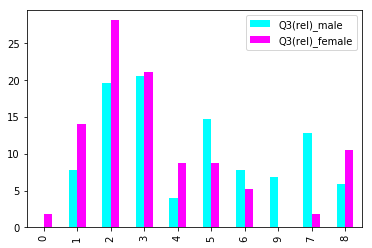

In [176]:
# Compare relative (size per bucket) 
display(salary_sex_compared_df[['Q21(I)', 'Q3(rel)_female', 'Q3(rel)_male']])
salary_sex_compared_df[['Q3(rel)_male', 'Q3(rel)_female']].plot(kind='bar', colormap='cool')

In [177]:
# Check statistical significance
sp.stats.ranksums(female['Q21(I)'], male['Q21(I)'])

RanksumsResult(statistic=-2.3992172786247603, pvalue=0.016430162149505975)

## By Region

In [183]:
# lets distribution by region
relevant_regions_count = DataFrame(df.groupby('Q6').count().iloc[:,1].reset_index(name='Q6(count)'))

# if we remove entries with less than 5 answers
relevant_regions_count.loc[relevant_regions_count['Q6(count)'] >= 5]

,Q6,Q6(count)
4,GRAD ZAGREB,89
10,OSJEČKO-BARANJSKA,13
12,SPLITSKO-DALMATINSKA,7
18,ZAGREBAČKA,24


### Grad Zagreb

In [184]:
def plot_region(region):
    # let check distribution for region by salary
    region_salary_data = df[df['Q6'] == region].groupby(['Q21(I)', 'Q21']).count().iloc[:,1].reset_index(name='Q21(count)')
    display(region_salary_data)

    # plot
    max_count = max(region_salary_data['Q21(count)']) + 1
    region_salary_data['Q21(count)'].plot(kind='bar', yticks=np.arange(0, max_count, 2), label='Q21')

,Q21(I),Q21,Q21(count)
0,1,Manje od 2800kn,1
1,2,2800kn - 4900kn,8
2,3,5000kn - 6900kn,17
3,4,7000kn - 8900kn,18
4,5,9000kn - 9900kn,5
5,6,10000kn - 12900kn,16
6,7,13000kn - 15900kn,9
7,8,16000kn - 20000kn,3
8,9,20000kn i više,7
9,10,Nisam zaposlen ali freelanceam,5


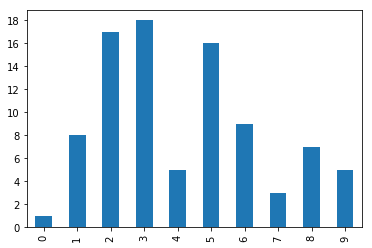

In [185]:
plot_region('GRAD ZAGREB')

### Osječko-Baranjska

,Q21(I),Q21,Q21(count)
0,2,2800kn - 4900kn,2
1,3,5000kn - 6900kn,3
2,4,7000kn - 8900kn,4
3,5,9000kn - 9900kn,1
4,9,20000kn i više,1
5,10,Nisam zaposlen ali freelanceam,2


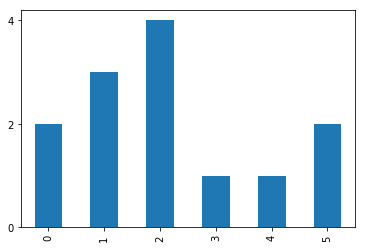

In [186]:
plot_region('OSJEČKO-BARANJSKA')

### Splitsko-Dalmatinska

,Q21(I),Q21,Q21(count)
0,2,2800kn - 4900kn,1
1,4,7000kn - 8900kn,2
2,5,9000kn - 9900kn,1
3,6,10000kn - 12900kn,1
4,7,13000kn - 15900kn,1
5,10,Nisam zaposlen ali freelanceam,1


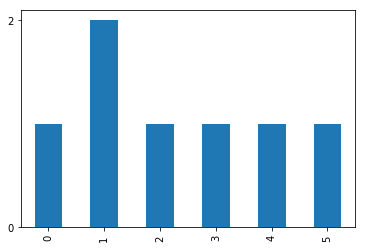

In [187]:
plot_region('SPLITSKO-DALMATINSKA')

### Zagrebacka

,Q21(I),Q21,Q21(count)
0,0,Trenutno nisam zaposlen,1
1,2,2800kn - 4900kn,1
2,3,5000kn - 6900kn,7
3,4,7000kn - 8900kn,7
4,5,9000kn - 9900kn,1
5,6,10000kn - 12900kn,1
6,9,20000kn i više,6


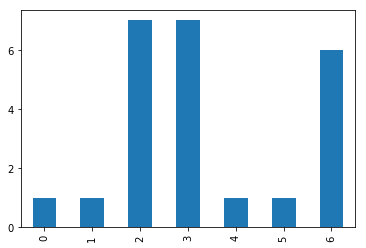

In [188]:
plot_region('ZAGREBAČKA')